# Chapter 1. Jupyter Notebook Crash

### Code Cells vs. Text Cells
### Executing a Command

In [2]:
2 + 2

4

In [3]:
X = 2

In [4]:
2 + 2
3 + 3

6

In [6]:
print(2 + 2)
3 + 3

4


6

한 문장의 수행 시간 한번 측정

In [2]:
%time x = [a for a in range(1000000)]

Wall time: 99.3 ms


한 문장의 수행 시간을 여러번 수행하여 평균 수행시간 측정

In [3]:
%timeit x = [a for a in range(1000000)]

165 ms ± 3.44 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


한 cell 의 여러문장의 수행시간을 여러번 수행하여 평균 수행시간 측정

In [4]:
%%timeit
a = 0
for i in range(100000):
    a += i
for j in range(100000):
    a += j

23.5 ms ± 846 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

### Tab Autocomplete

In [6]:
np.random.normal?

### Sampling

normal distribution

In [7]:
X = np.random.normal(0, 1, 100)

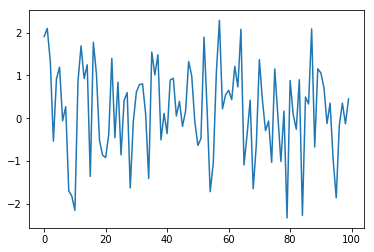

In [8]:
plt.plot(X);

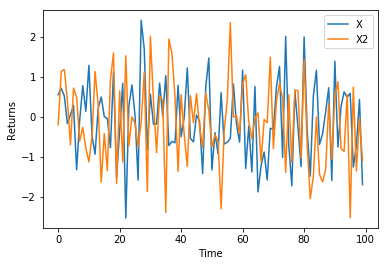

In [55]:
X = np.random.normal(0, 1, 100)  # mean 0, std 1 인 100 개의 normal distribution
X2 = np.random.normal(0, 1, 100)

plt.plot(X);
plt.plot(X2);
plt.xlabel('Time') # The data we generated is unitless, but don't forget units in general.
plt.ylabel('Returns')
plt.legend(['X', 'X2']);

In [56]:
np.mean(X)

-0.08993272470884664

In [57]:
np.std(X)

0.96730761376130936

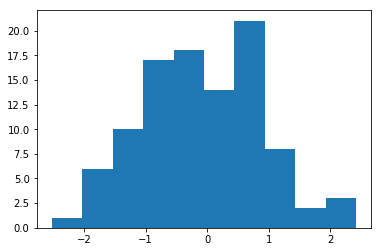

In [58]:
plt.hist(X, bins=10);

In [59]:
from googlefinance.client import get_price_data, get_prices_data
import pandas as pd
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2015-01-01')     
df = pd.DataFrame(
            get_price_data({'q': "MSFT", 'i': "86400", 'x': "NASD", 'p': "20Y" })).loc[start : end]
df.index = pd.to_datetime(df.index.date)
#data = pd.DataFrame(df.values, index=df.index)
df.head()

,Open,High,Low,Close,Volume
2012-01-04,26.5500,26.960,26.390,26.765,64735391
2012-01-05,26.8199,27.470,26.780,27.400,80519402
2012-01-06,27.3800,27.728,27.290,27.680,56082205
2012-01-07,27.5300,28.190,27.525,28.105,99459469
2012-01-10,28.0500,28.100,27.720,27.740,59708266


In [60]:
X = df['Close']

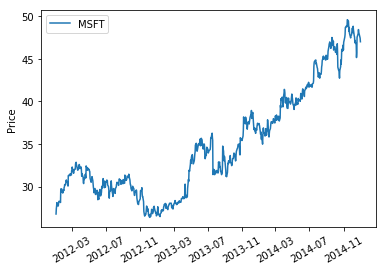

In [145]:
plt.plot(X.index, X.values)
plt.ylabel('Price')
plt.legend(['MSFT']);
plt.xticks(rotation=30);

### Getting Returns from Prices

The PDF of a normal random variable is:

$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$

And is defined for $-\infty < x < \infty$. When we have $\mu = 0$ and $\sigma = 1$, we call this the standard normal distribution.

In [154]:
R = X.pct_change()[1:]            # daily return

In [155]:
sample_mean = np.mean(R)
sample_mean

0.00084339340743332797

In [156]:
sample_std = np.std(R)
sample_std

0.013676793636231751

In [157]:
x = np.linspace(-(sample_mean + 4 * sample_std), (sample_mean + 4 * sample_std), len(R))
sample_distribution = ((1/np.sqrt(sample_std * sample_std * 2 * np.pi)) * 
                       np.exp(-(x - sample_mean)*(x - sample_mean) / (2 * sample_std * sample_std)))

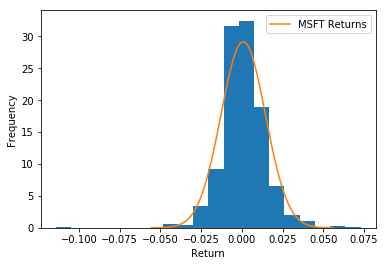

In [163]:
plt.hist(R, bins=20, density=1)
plt.plot(x, sample_distribution)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['MSFT Returns']);

이제 Microsoft의 수익에서 추정 한 통계를 사용하여 정규 분포에 따른 데이터를 생성 해 봅시다. 그래프의 결과가 크게 다르므로 Microsoft의 수익률이 정규분포를 따르지 않을 수 있다고 의심할만한 이유가 있음을 알게 될 것입니다. 

Normality 여부는 Jarque-Bera test 를 통해 판정할 수 있습니다. 

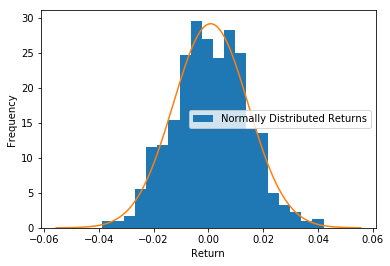

In [165]:
plt.hist(np.random.normal(sample_mean, sample_std,len(R)), bins=20, density=1)
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend(['Normally Distributed Returns'])
plt.plot(x, sample_distribution);

In [166]:
from statsmodels.stats.stattools import jarque_bera

_, pvalue, skewness, kurtosis = jarque_bera(R)

if pvalue > 0.05:
    print("It's likely normal")
else:
    print("It's likely not normal")

print("kurtosis : ", kurtosis)

It's likely not normal
kurtosis :  11.2869634460612


따라서, 위의 MFST daily return data 는 정규분포가 아니다. 또한 모든 정규분포는 kurtosis 가 3 이고, kurtosis > 3 인 폭이 좁은 분포는 peak 가 높고 fat tail 을 가지고 있다.

### Generating a Moving Average

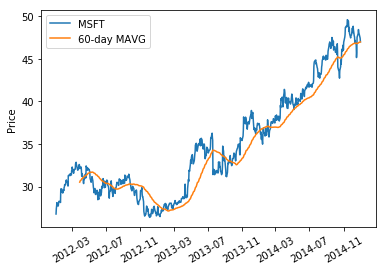

In [170]:
MAVG = X.rolling(60).mean()
plt.plot(X.index, X.values)
plt.plot(MAVG.index, MAVG.values)
plt.ylabel('Price')
plt.legend(['MSFT', '60-day MAVG'])
plt.xticks(rotation=30);